In [ ]:
import pandas as pd
import numpy as np
!pip install mne
import mne

In [ ]:
path = "OpenBCI-RAW-2024-03-06_20-42-32.txt"
df = pd.read_csv(path, delimiter = ',', skiprows=300)
data = df.to_numpy()

In [ ]:
sfreq = 250  # sample rate in Hz
#data = np.delete(data, [12, 13, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
data = data[:, :-1] # removes timestamps
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=24, n_times=196086
    Range : 0 ... 196085 =      0.000 ...   784.340 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[ 52081.73270008  52089.13112749  52103.50329918 ...  62901.85456298
   62892.42212682  62867.96931839]
 [-23992.16133263 -23986.86396919 -23975.06224812 ...   5452.32808022
    5433.39615266   5413.97248673]
 [  2742.89432083   2627.91694735   3008.5001002  ...   6453.932101
    6282.76244196   5860.15800955]
 ...
 [ 50146.33985118  50147.4574384   50244.68752678 ...  49934.46766549
   49840.65739401  49773.7809746 ]
 [ 63484.05045081  63492.38765149  63573.36802165 ...  69121.76389954
   68993.28607241  68863.28832666]
 [ 29254.6113437   29264.22259381  29290.35178308 ...  33889.51377744
   33877.93557381  33869.50896615]]
NOTE: pick_types() is a legacy 

<ipython-input-13-099ca32318f6>:12: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-13-099ca32318f6>:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


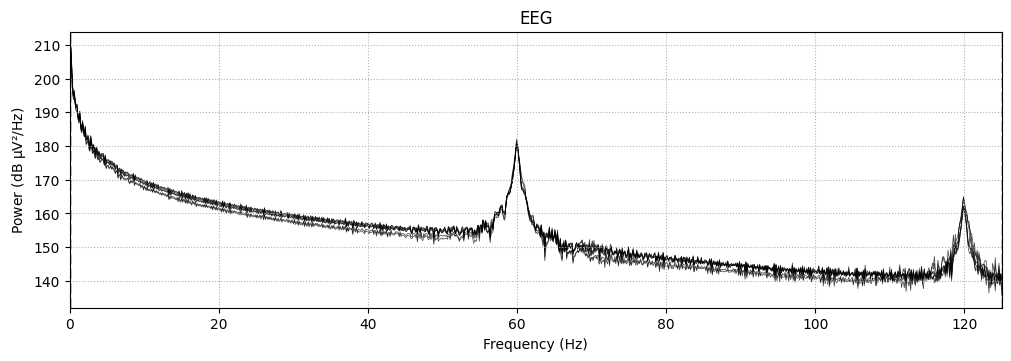

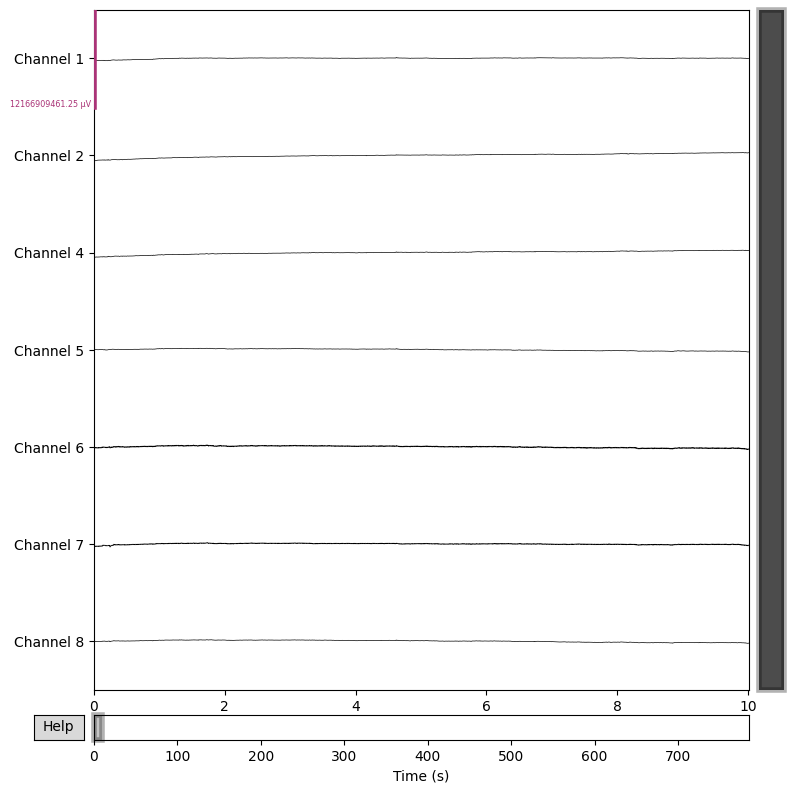

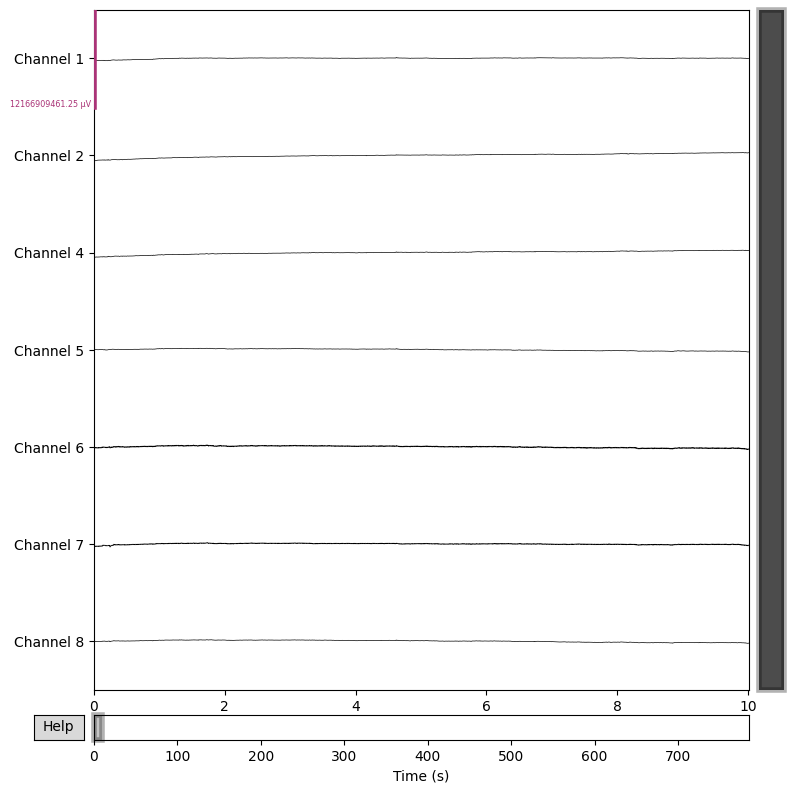

In [ ]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())
bad_channels = ['Channel 3']  # List of channel names to mark as bad
raw.info['bads'] = bad_channels

# Remove bad channels from further analysis
raw.pick_types(eeg=True, exclude='bads')
raw.plot_psd()
raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge

<ipython-input-14-7bb7c58aeafa>:9: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-14-7bb7c58aeafa>:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


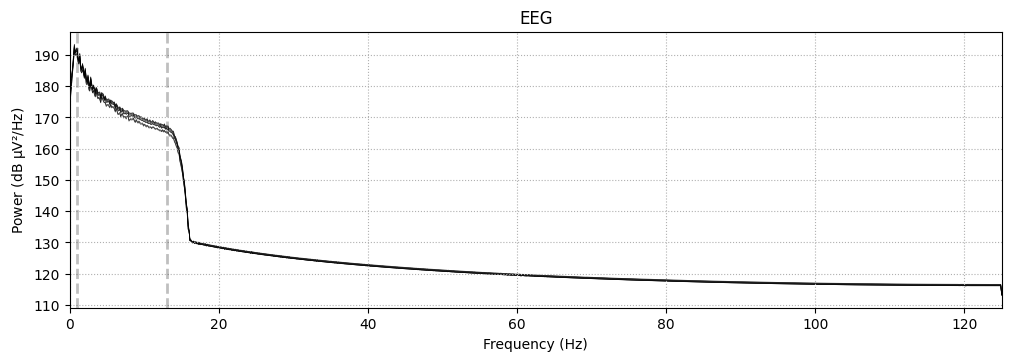

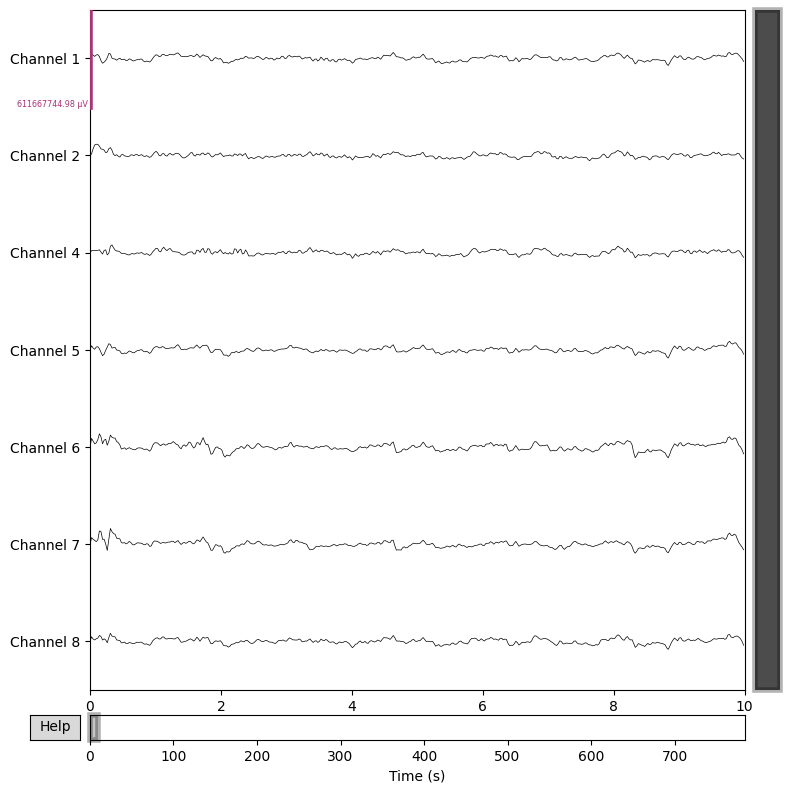

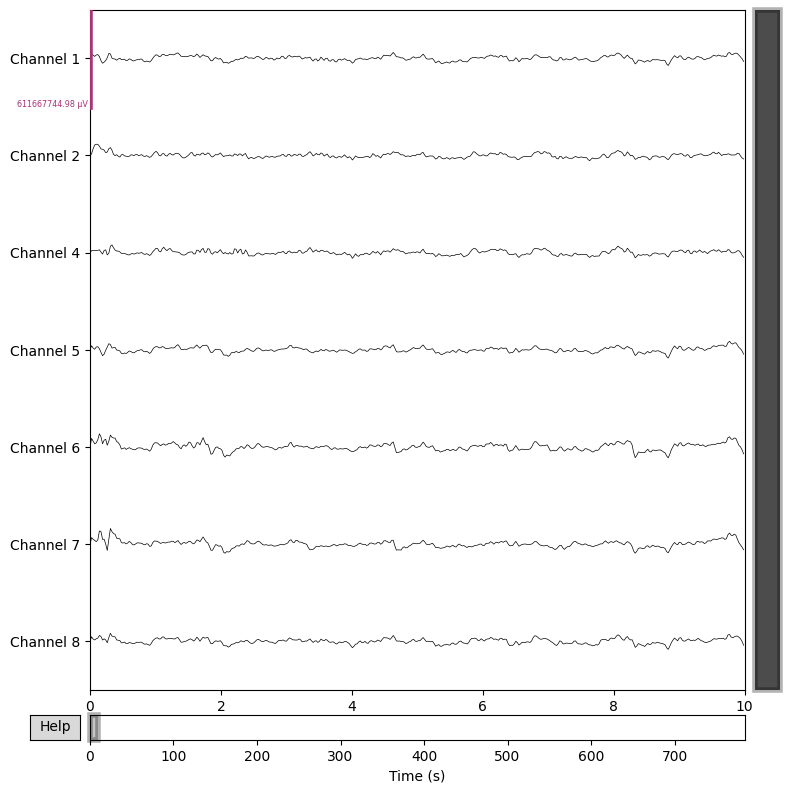

In [ ]:
# Time to start filtering
# 60hz electrical filter
raw.notch_filter(60)


# Research said filter to alpha/beta waves
raw.filter(l_freq=1, h_freq=13)

raw.plot_psd()
raw.plot(scalings='auto')



In [ ]:
filteredData = raw._data
num_samples = len(filteredData[0])
filteredData = np.append(filteredData, np.zeros([1, num_samples]), 0)
for row in filteredData:
  print(row)

[-4.71978012e-12  6.59704519e+00  1.28379819e+01 ...  2.79178557e+00
  1.43549359e+00 -7.36477546e-12]
[ 7.85149723e-13  1.19104120e+00  2.57752960e+00 ...  7.22708324e+00
  3.70843279e+00 -4.79616347e-13]
[2.94964053e-12 3.15850381e+00 6.16070482e+00 ... 2.94267130e+00
 1.47359017e+00 2.80664381e-13]
[-1.43884904e-12  6.79345427e+00  1.31449273e+01 ...  2.30335012e+00
  1.20889483e+00 -3.71969122e-12]
[-2.73914225e-12  1.35448028e+01  2.63095053e+01 ...  3.08996068e+01
  1.58432747e+01 -8.19078139e-12]
[-9.12692144e-12  1.09264122e+01  2.11811632e+01 ...  5.00526531e+01
  2.56949522e+01 -1.73727699e-12]
[-1.19904087e-12  7.62998951e+00  1.47429728e+01 ...  1.49990730e+00
  7.42079387e-01 -5.90993920e-12]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
list_of_times = [[55, 68],[87, 116],[134,164], [181,215], [233,262], [279,309], [326,357], [374,405], [527,557], [572,603], [620,650], [667,714], [782,761]]
for interval in list_of_times:
  interval[0] *= sfreq
  interval[1] *= sfreq
for interval in list_of_times:
  for i in range(interval[0], interval[1]):
    filteredData[7, i] = 1

for i in range(77 * sfreq, 88 * sfreq):
   print(filteredData[7,i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
